# Modelado Estocástico
## Clase 2 - Ejercitación 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter

In [ ]:
df = pd.read_excel('MIA103_Clase_2.xlsx', sheet_name="PBI Real USA", usecols="B:C", skiprows=10, nrows=96)
df.head()

,Año,GDPCA
0,1929,1191.124
1,1930,1089.785
2,1931,1019.977
3,1932,888.414
4,1933,877.431


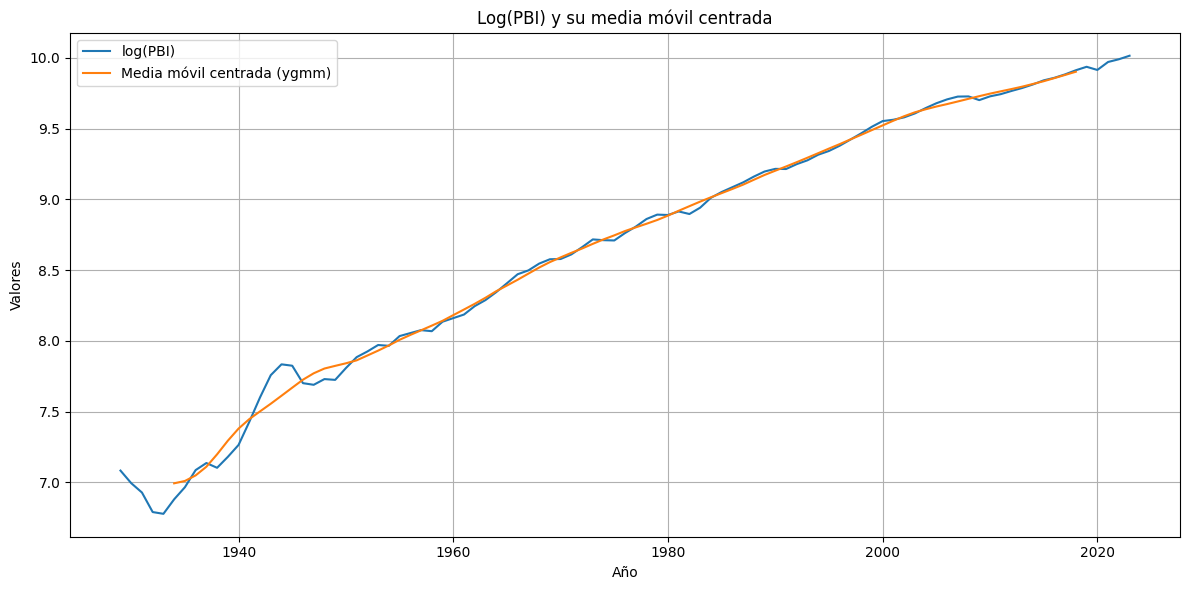

In [ ]:
df = df.sort_values("Año").reset_index(drop=True)
df["log_pbi"] = np.log(df["GDPCA"])
df["ygmm"] = df["log_pbi"].rolling(window=11, center=True).mean()
plt.figure(figsize=(12, 6))

plt.plot(df["Año"], df["log_pbi"], label="log(PBI)")

plt.plot(df["Año"], df["ygmm"], label="Media móvil centrada (ygmm)")

plt.xlabel("Año")
plt.ylabel("Valores")
plt.title("Log(PBI) y su media móvil centrada")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

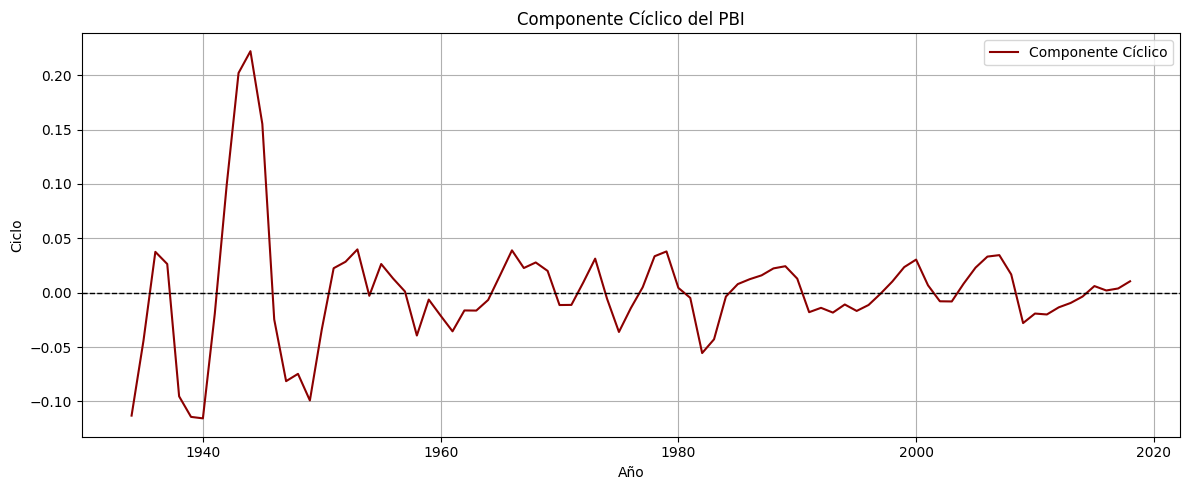

In [ ]:
df["ciclo"] = df["log_pbi"] - df["ygmm"]
plt.figure(figsize=(12, 5))

plt.plot(df["Año"], df["ciclo"], label="Componente Cíclico", color="darkred")

plt.axhline(0, color="black", linestyle="--", linewidth=1)

plt.xlabel("Año")
plt.ylabel("Ciclo")
plt.title("Componente Cíclico del PBI")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

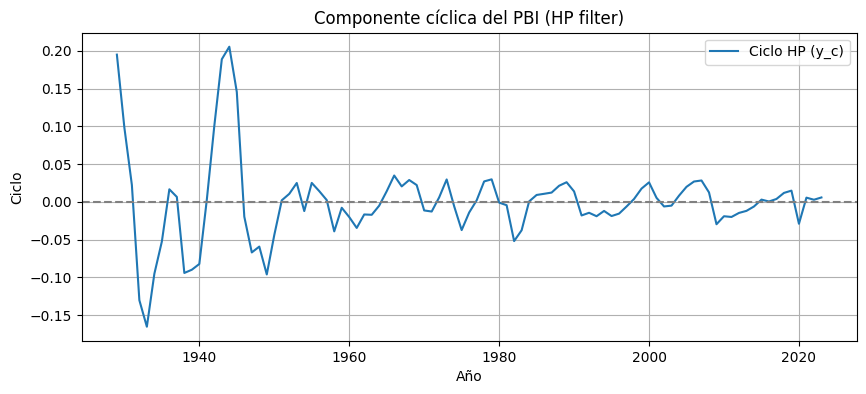

In [ ]:
cycle, trend = hpfilter(df["log_pbi"], lamb=100)
df["y_g"] = trend
df["y_c"] = cycle
plt.figure(figsize=(10, 4))
plt.plot(df["Año"], df["y_c"], label="Ciclo HP (y_c)")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Año")
plt.ylabel("Ciclo")
plt.title("Componente cíclica del PBI (HP filter)")
plt.legend()
plt.grid(True)
plt.show()



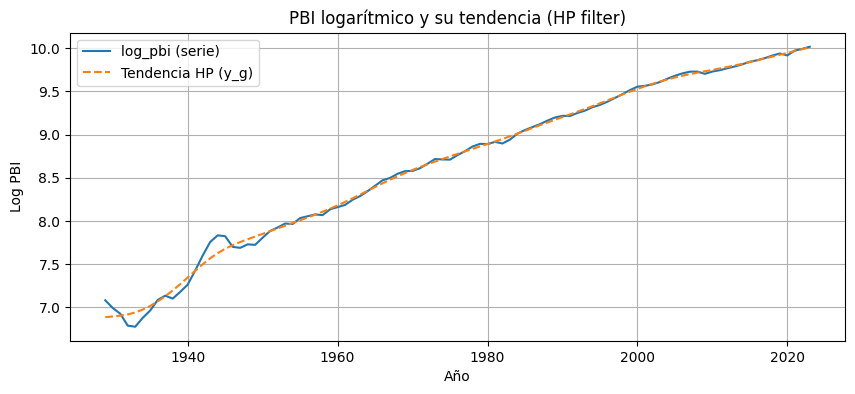

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df["Año"], df["log_pbi"], label="log_pbi (serie)")
plt.plot(df["Año"], df["y_g"], label="Tendencia HP (y_g)", linestyle='--')
plt.xlabel("Año")
plt.ylabel("Log PBI")
plt.title("PBI logarítmico y su tendencia (HP filter)")
plt.legend()
plt.grid(True)
plt.show()